# 6.6 Analyzing Times Series Data


### a) Import Libraries 
### b) Import data and conduct manipulation, reprocessing on a subset
### c) Line Chart of subset data
### d) decomposition of data´s components
### e) Dickey-Fuller test
### f) Stationarizing data


### a) Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.
warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight')

### b) Import data and conduct manipulation, reprocessing on a subset

In [2]:
# set path
path = r'C:\Users\rieke\Data Analytics\Achievement 6\02 Data'

In [3]:
df = pd.read_excel(os.path.join(path, '02 Prepared Data', 'without totals_WW 2010 - 2022.xlsx'), index_col = False)

In [4]:
df.head()

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
0,Australia,JAN2010,January 2010,2010,1,January,Hydro,990.728,1,16471.891,NaN,0.047771
1,Australia,JAN2010,January 2010,2010,1,January,Wind,409.469,2,4940.909,NaN,0.019744
2,Australia,JAN2010,January 2010,2010,1,January,Solar,49.216,3,908.238,NaN,0.002373
3,Australia,JAN2010,January 2010,2010,1,January,Geothermal,0.083,4,0.996,NaN,0.000004
4,Australia,JAN2010,January 2010,2010,1,January,Coal,14796.776,8,163887.775,NaN,0.713468


In [5]:
df.shape

(112162, 12)

In [6]:
df.columns

Index(['COUNTRY', 'CODE_TIME', 'TIME', 'YEAR', 'MONTH', 'MONTH_NAME',
       'PRODUCT', 'VALUE', 'DISPLAY_ORDER', 'yearToDate', 'previousYearToDate',
       'share'],
      dtype='object')

In [7]:
# create subset
df_sub = df.loc[:, ['YEAR', 'MONTH', 'VALUE']]

In [8]:
df_sub.head()

,YEAR,MONTH,VALUE
0,2010,1,990.728
1,2010,1,409.469
2,2010,1,49.216
3,2010,1,0.083
4,2010,1,14796.776


In [9]:
# set new column with datetime variable
df_sub['DATE'] = pd.to_datetime(df_sub[['YEAR', 'MONTH']].assign(Day=1))

In [10]:
df_sub.head()

,YEAR,MONTH,VALUE,DATE
0,2010,1,990.728,2010-01-01
1,2010,1,409.469,2010-01-01
2,2010,1,49.216,2010-01-01
3,2010,1,0.083,2010-01-01
4,2010,1,14796.776,2010-01-01


In [11]:
# reorder columns, exclude the year & Month which are not longer needed as we have the new date column
df_sub = df_sub[['DATE', 'VALUE']]

In [12]:
df_sub.head()

,DATE,VALUE
0,2010-01-01,990.728
1,2010-01-01,409.469
2,2010-01-01,49.216
3,2010-01-01,0.083
4,2010-01-01,14796.776


In [13]:
# grouping data by date with mean
df_sub = df_sub.groupby('DATE').agg({'VALUE': ['mean']})

In [14]:
df_sub.rename(columns = {'DATE':'datetime', 'VALUE':'mean_value'}, inplace = True)

In [15]:
df_sub.head()

,mean_value
,mean
DATE,
2010-01-01,6748.025007
2010-02-01,6013.969984
2010-03-01,6120.487997
2010-04-01,5486.286318
2010-05-01,5766.460265


to get a suitable subset for further analysis I decided to take the mean value of all Countries and kinds of produce by Year/Month. This will lead to the worldwide mean of energy produced over the years.

### c) Line Chart of subset data

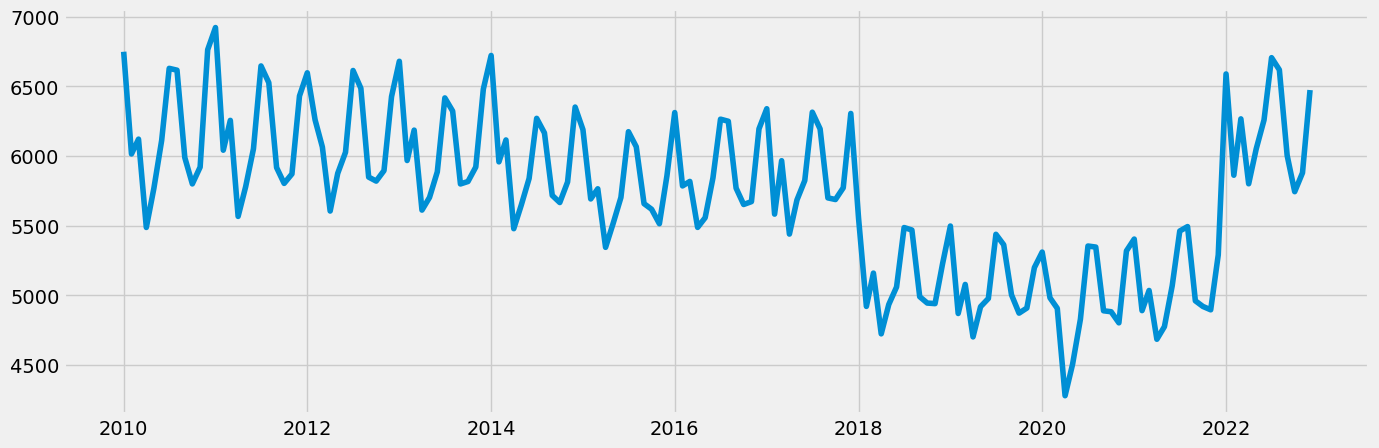

In [33]:
# plot new dataset
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub)

In [34]:
# Check for missing values 
df_sub.isnull().sum() 

mean_value  mean    0
dtype: int64

In [35]:
# Check for duplicates
dups = df_sub.duplicated()
dups.sum()

0

### d) decomposition of data´s components

In [36]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(df_sub, model='additive')

In [37]:
# fix size for all following charts
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

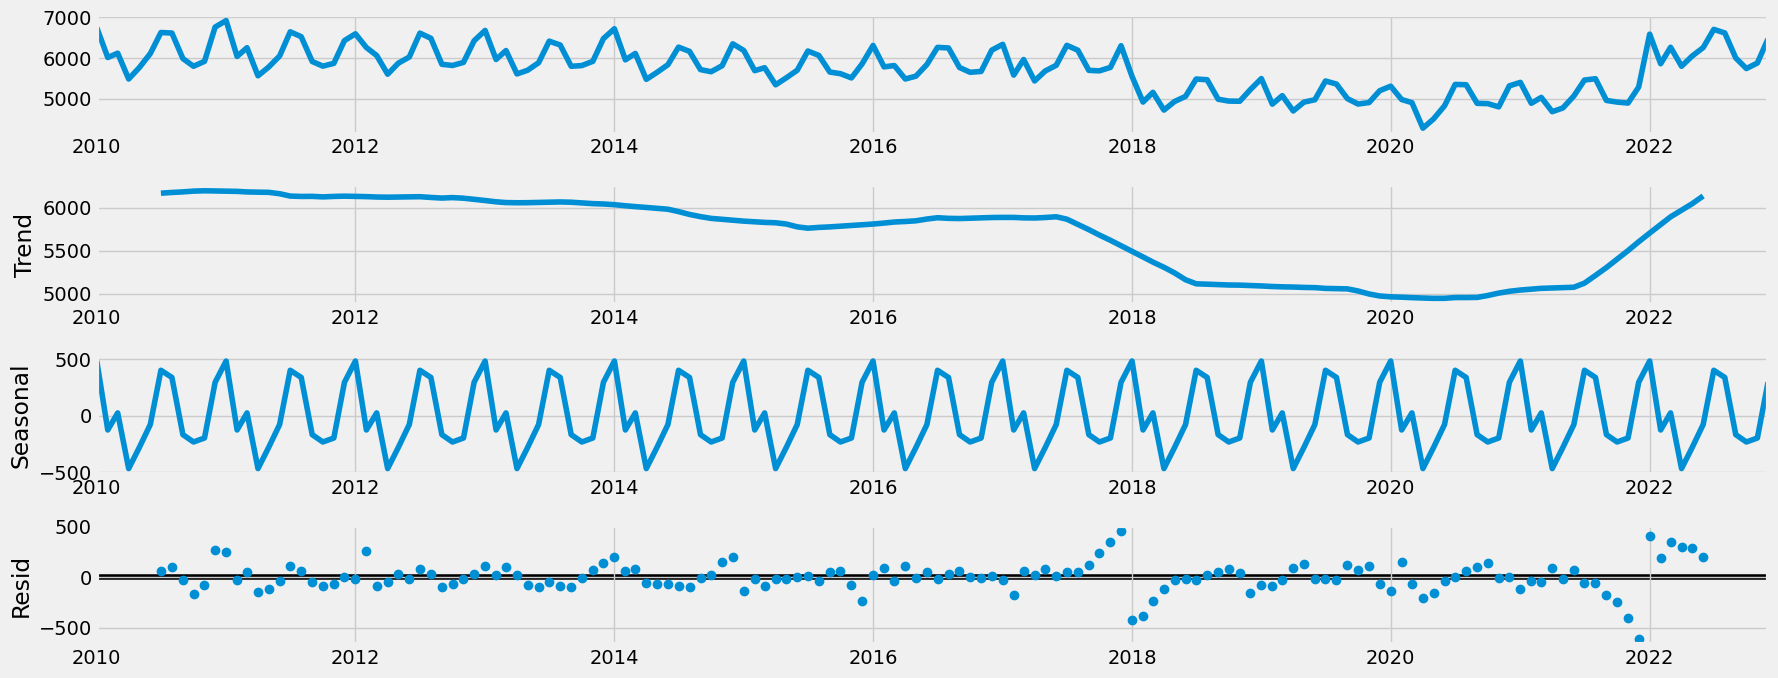

In [38]:
# Plot components Trends, Seasonality and Noise
decomposition.plot()
plt.show()

The Trend in the chart above drops from 2018, going upwards again from 2021.

The Seasonality is presented by a spikey curve, showing ups and downs that are regularly repeated.

The Noise is already smoothened by taking the mean of produced energy values.

### e) Dickey-Fuller test - testing for stationarity

In [26]:
# Import adfuller function
from statsmodels.tsa.stattools import adfuller
# define the function
def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)
dickey_fuller(df_sub['mean_value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -1.743518
p-value                          0.408842
Number of Lags Used             13.000000
Number of Observations Used    142.000000
Critical Value (1%)             -3.477262
Critical Value (5%)             -2.882118
Critical Value (10%)            -2.577743
dtype: float64


- The Test statisctic is more than 0,05
- p- value lies over the significance level/s
- Null hypothesis "there is a unit root in the data" can´t be rejected
--> there is a unit root in the data, so it is not stationary and needs to be stationarized

### f) Stationarizing data

In [27]:
data_diff = df_sub - df_sub.shift(1)

In [28]:
data_diff.dropna(inplace = True)

In [29]:
data_diff.head()

,mean_value
,mean
DATE,
2010-02-01,-734.055023
2010-03-01,106.518012
2010-04-01,-634.201679
2010-05-01,280.173948
2010-06-01,344.589588


In [30]:
data_diff.columns

MultiIndex([('mean_value', 'mean')],
           )

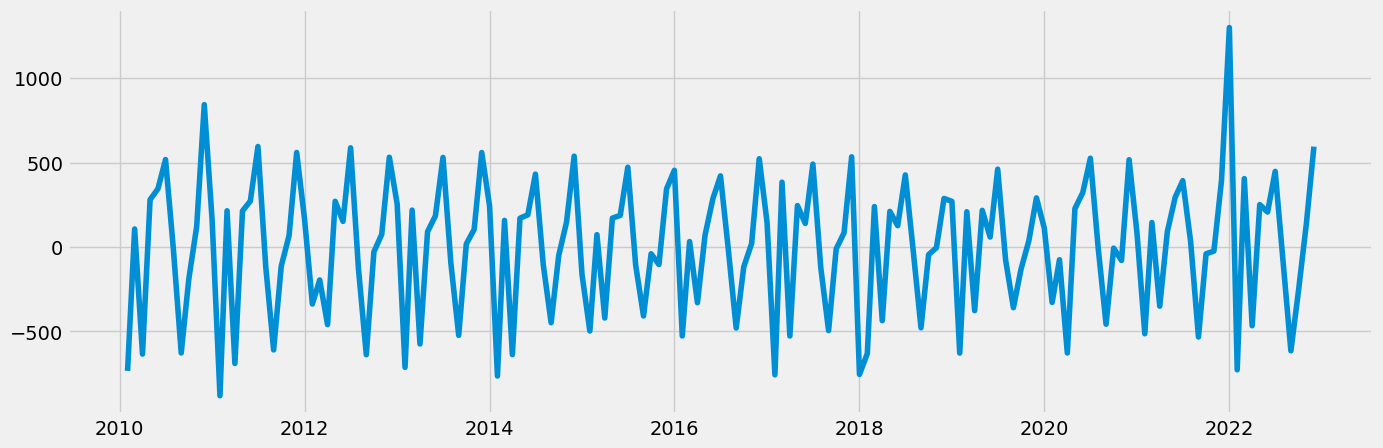

In [31]:
# new time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [32]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -1.742533
p-value                          0.409342
Number of Lags Used             12.000000
Number of Observations Used    142.000000
Critical Value (1%)             -3.477262
Critical Value (5%)             -2.882118
Critical Value (10%)            -2.577743
dtype: float64


Data is still ot stationary

### 2nd round of differencing

In [33]:
data_diff2 = data_diff - data_diff.shift(1)

In [34]:
data_diff2.dropna(inplace = True)

In [35]:
data_diff2.head()

,mean_value
,mean
DATE,
2010-03-01,840.573035
2010-04-01,-740.719691
2010-05-01,914.375627
2010-06-01,64.415640
2010-07-01,173.165344


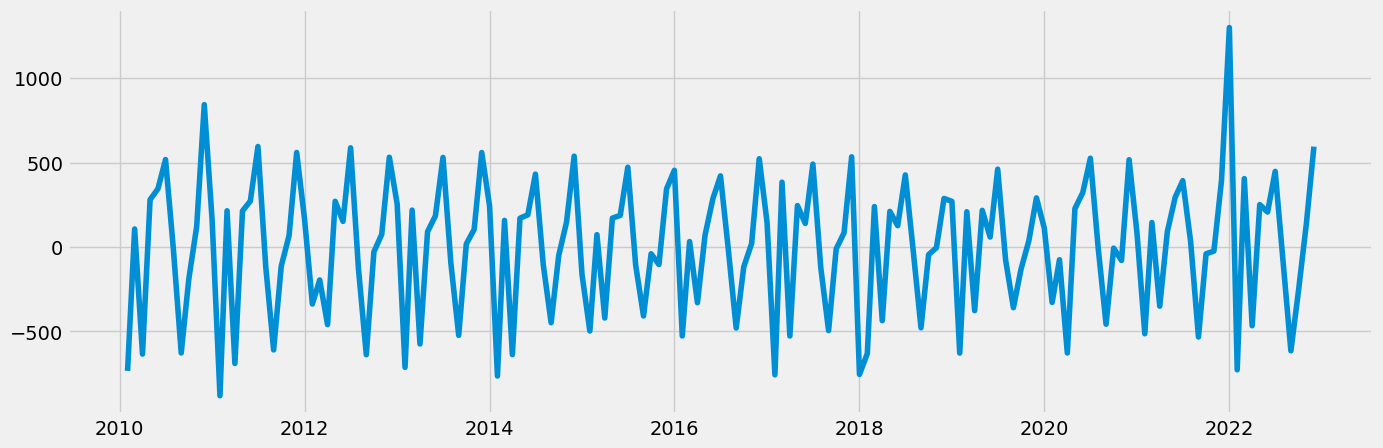

In [37]:
# new time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [38]:
dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                -9.757855e+00
p-value                        7.703346e-17
Number of Lags Used            1.100000e+01
Number of Observations Used    1.420000e+02
Critical Value (1%)           -3.477262e+00
Critical Value (5%)           -2.882118e+00
Critical Value (10%)          -2.577743e+00
dtype: float64


The Test Statiostic is fine now, but the p-value is completely out of range

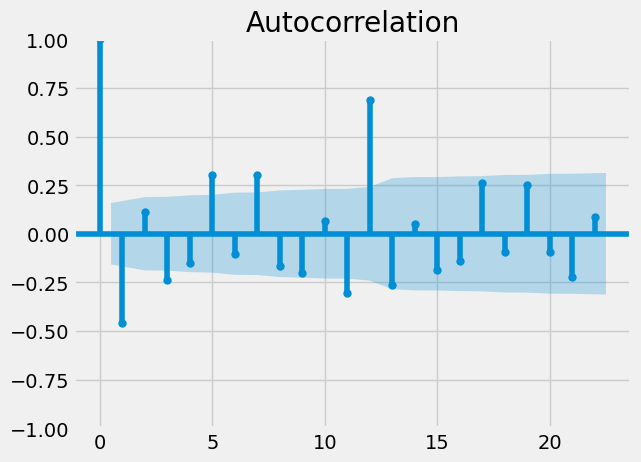

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_diff2)
plt.show()

data are not autocorrelated